### 1. Significant earthquakes since 2150 B.C.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
Sig_Eqs = pd.read_csv("earthquakes-2022-10-25_09-17-48_+0800.tsv", delimiter = '\t')
Sig_Eqs.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [3]:
# 1.1
Sig_Eqs.groupby(['Country'])['Total Deaths'].sum().sort_values(ascending=False)[0:20]

Country
CHINA           2041903.0
TURKEY           927459.0
IRAN             758647.0
SYRIA            437700.0
ITALY            422678.0
JAPAN            355140.0
HAITI            323772.0
AZERBAIJAN       310119.0
INDONESIA        282153.0
ARMENIA          189000.0
PAKISTAN         143712.0
ECUADOR          134428.0
TURKMENISTAN     110412.0
PERU              96161.0
PORTUGAL          82531.0
GREECE            80271.0
IRAQ              70200.0
CHILE             70174.0
INDIA             62396.0
TAIWAN            57705.0
Name: Total Deaths, dtype: float64

<AxesSubplot:xlabel='Year'>

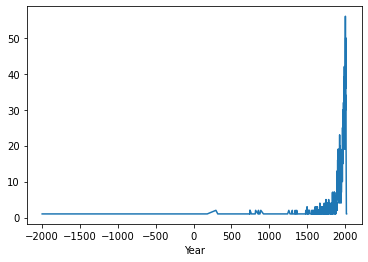

In [4]:
# 1.2
pl1=Sig_Eqs.loc[Sig_Eqs['Ms']>3.0].groupby(['Year'])['Ms'].count()
pl1
pl1.plot(x='year',y='Ms')

The number of earthquakes has gradually increased since the distant period.
Melting ice causes the Earth's crust to be pushed by magma beneath it, increasing plate movement.

In [8]:
# 1.3
y1=Sig_Eqs.groupby(['Country'])['Year'].count()
y2=Sig_Eqs.groupby(['Country'])['Ms'].max()
country=[]
number=[]
Ms=[]
date=[]
location=[]

for (Country),group in Sig_Eqs[Sig_Eqs['Ms']>0].groupby('Country'):
    country.append(Country)
# country=Sig_Eqs['Country'].unique()
country
def CountEq_LargestEq(country):   
    for i in country:
        y3=y1[i]
        number.append(y3)
        y4=y2[i]
        Ms.append(y4)
        y5=Sig_Eqs.loc[(Sig_Eqs['Ms']==y4) & (Sig_Eqs['Country']==i)]['Year']
        date.append(y5)
        y6=Sig_Eqs[(Sig_Eqs['Country']==i) & (Sig_Eqs['Ms']==y4)]['Location Name']
        location.append(y6)
    df = pd.DataFrame({'Country':country, 'Ms':Ms, 'Total_number':number, 'date':date, 'location':location})
    df = df.sort_values('Ms',ascending=False)
    return df

CountEq_LargestEq(country)

,Country,Ms,Total_number,date,location
121,USA,9.1,271,"3746 1957.0 Name: Year, dtype: float64","3746 ALASKA Name: Location Name, dtype: object"
51,INDONESIA,8.8,405,"5327 2004.0 Name: Year, dtype: float64",5327 INDONESIA: SUMATRA: ACEH: OFF WEST ...
49,INDIA,8.7,99,"2458 1897.0 Name: Year, dtype: float64",2458 INDIA: ASSAM; BANGLADESH Name: Locati...
20,CHILE,8.7,198,"1169 1730.0 Name: Year, dtype: float64",1169 CHILE: VALPARAISO Name: Location Name...
89,PHILIPPINES,8.7,222,"2465 1897.0 Name: Year, dtype: float64","2465 PHILIPPINES: MINDANAO, ZAMBOANGA, SUL..."
...,...,...,...,...,...
77,NETHERLANDS,5.2,3,"4824 1992.0 Name: Year, dtype: float64",4824 THE NETHERLANDS: ROERMOND; GERMANY: BO...
106,SUDAN,5.1,1,"4861 1993.0 Name: Year, dtype: float64","4861 SUDAN: KHARTOUM Name: Location Name, ..."
94,RWANDA,4.9,5,"5528 2008.0 Name: Year, dtype: float64","5528 RWANDA: GISENYI Name: Location Name, ..."
17,BRAZIL,4.8,7,"4624 1986.0 Name: Year, dtype: float64","4624 BRAZIL: JOAO CAMARA, NATAL Name: Loca..."


### 2. Air temperature in Shenzhen during the past 25 years

In [131]:
import numpy as 
Air_tmp=pd.read_csv("Baoan_Weather_1998_2022.csv")

C:\Users\wd\AppData\Local\Temp\ipykernel_16276\3387724967.py:2: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  Air_tmp=pd.read_csv("Baoan_Weather_1998_2022.csv")


Report: 比例因子为10，TMP列数据逗号前前四位数除以比例因子即为温度，逗号后一位数代表观测空气温度的质量。

<AxesSubplot:>

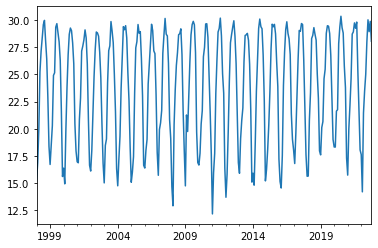

In [134]:
AT_new =Air_tmp.loc[:,['DATE','TMP']]
for i in range(len(AT_new)):
    AT_new.iloc[i,1] = int(AT_new['TMP'][i][1:5])
ap = AT_new['TMP'].values
ap[ap==9999] = np.nan
ap = ap/10 
AT_new['TMP'] = ap
AT_new['DATE'] = pd.to_datetime(AT_new['DATE'])
AT_new.rename(index = AT_new['DATE'],inplace=True)
AT_new.resample('M').mean()['TMP'].plot()###参考陈禹凡

年平均气温呈现季节规律性，8月气温达到峰值，明显季风气候。

### 3. Global collection of hurricanes

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 1], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME',' '])###参考陈禹凡同学，将空值转换为NA
df.head()

C:\Users\wd\AppData\Local\Temp\ipykernel_16276\725947886.py:3: DtypeWarning: Columns (5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN,NaN,main,43,0.0,__________O___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN,NaN,main,0,0.0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN,NaN,main,0,0.0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN,NaN,main,0,0.0,__________P___
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN,NaN,main,0,0.0,__________O___


In [2]:
# 3.1
select_cols=['SID','NAME','WMO_WIND']
df1=df[select_cols]
df1.head()
df1['WMO_WIND'].max()
df1.groupby(['SID','NAME']).max().sort_values(['WMO_WIND'],ascending=False)[0:10]
#求出风速最大值为95，但是源文件里最大为185,后来发现是读取数据时没有将空值转换为NA值,参考陈禹凡同学

,,WMO_WIND
SID,NAME,
2015293N13266,PATRICIA,185.0
1980214N11330,ALLEN,165.0
1988253N12306,GILBERT,160.0
2005289N18282,WILMA,160.0
1997253N12255,LINDA,160.0
2019236N10314,DORIAN,160.0
2009288N07267,RICK,155.0
2017242N16333,IRMA,155.0
2005261N21290,RITA,155.0


<AxesSubplot:xlabel='SID,NAME'>

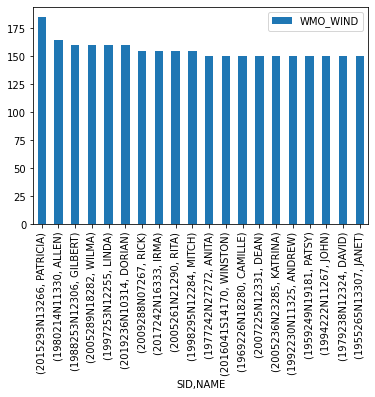

In [9]:
# 3.2
df2=df1.groupby(['SID','NAME']).max().sort_values(['WMO_WIND'],ascending=False)[0:20]
df2.plot(kind='bar')
# plt.bar(df2['SID'],df2['WMO_WIND'])

Text(0, 0.5, 'Count')

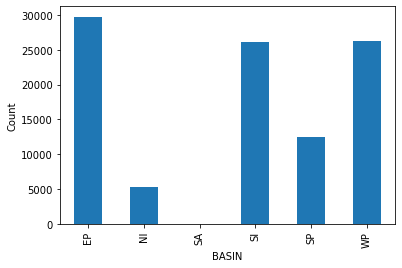

In [3]:
# 3.3
df.groupby("BASIN")['WMO_WIND'].count().plot(kind='bar')
plt.ylabel('Count')

<AxesSubplot:xlabel='LON', ylabel='LAT'>

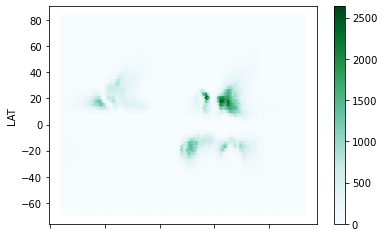

In [4]:
# 3.4
df.plot.hexbin(x='LON',y='LAT')

<AxesSubplot:xlabel='LON', ylabel='LAT'>

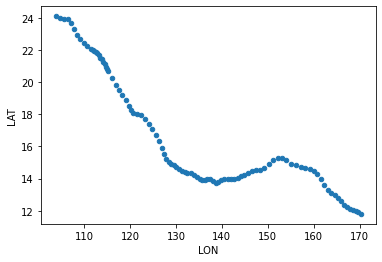

In [5]:
# 3.5 
df3=df.loc[(df['NAME']=='MANGKHUT') & (df['SEASON']==2018)]
df3.head()
df3.plot.scatter(x='LON', y='LAT')


In [7]:
# 3.6
df_new=df[((df['BASIN']=='EP')|(df['BASIN']=='WP')) & (df['SEASON']>=1970)]#将or改为|可运行结果
df_new

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006.0,tokyo,main,1088,1088.0,_OO___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,NaN,NaN,main,1109,1109.0,_PP___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002.0,tokyo,main,1143,1143.0,_OO___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,NaN,NaN,main,1171,1168.0,_PP___________
350398,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998.0,tokyo,main,1182,1179.0,_OO___________
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,NaN,NaN,NaN,PROVISIONAL,0,0.0,P_____________
707086,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,NaN,NaN,NaN,PROVISIONAL,0,NaN,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,NaN,NaN,NaN,PROVISIONAL,1985,1974.0,O_____________
707175,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,NaN,NaN,NaN,PROVISIONAL,1974,1952.0,P_____________


C:\Users\wd\AppData\Local\Temp\ipykernel_16276\2237416517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[:, 'date'] = pd.to_datetime(df_new['ISO_TIME'].apply(lambda x: x.strftime('%Y-%m-%d'))).values


<AxesSubplot:xlabel='date'>

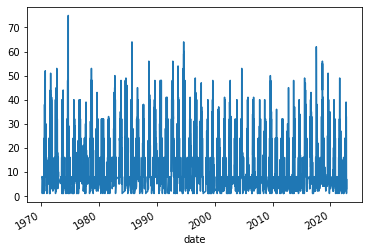

In [17]:
# 3.7
df_new.loc[:, 'date'] = pd.to_datetime(df_new['ISO_TIME'].apply(lambda x: x.strftime('%Y-%m-%d'))).values
###参考 https://blog.csdn.net/Caiqiudan/article/details/121494272 提取时间的年月日
df_new['date']
df_new1=df_new.groupby('date')['NUMBER'].count()
df_new1
df_new1.plot()

C:\Users\wd\AppData\Local\Temp\ipykernel_16276\1050350642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['year'] = df_new['date'].dt.year


<AxesSubplot:xlabel='year'>

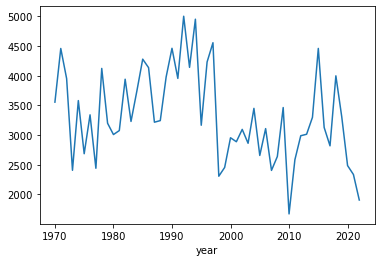

In [24]:
# 3.10
df_new['year'] = df_new['date'].dt.year
df_new_number=df_new.groupby('year')['SID'].count()
df_new_number.plot()

### 4. Explore a data set

In [51]:
# 4.1
import pandas as pd
import matplotlib.pyplot as plt
Em=pd.read_excel("em-cfc-11.xls",
                 nrows=73,
                 usecols=range(23),
                 skiprows=4)
Em.dropna(axis=1,how='all',inplace=True)
Em.columns = ['Year', 
              'Annual Production', 'Annual Released', 
              'Total Production', 'Total Released', 'Total Unreleased', 
              'Refrigeration hermetic Sales' , 'Refrigeration hermetic Released', 'Refrigeration hermetic Unreleased',
             'Refrigeration NON-hermetic Sales', 'Refrigeration NON-hermetic Released', 'Refrigeration NON-hermetic Unreleased', 
             'Blowing Agents Closed Cell Foam Sales', 'Blowing Agents Closed Cell Foam Released', 'Blowing Agents Closed Cell Foam Unreleased',
             'Open Cell Foam, Aerosols & Others Sales', 'Open Cell Foam, Aerosols & Others Released', 'Open Cell Foam, Aerosols & Others Unreleased']
Em
#No missing values or bad quality

,Year,Annual Production,Annual Released,Total Production,Total Released,Total Unreleased,Refrigeration hermetic Sales,Refrigeration hermetic Released,Refrigeration hermetic Unreleased,Refrigeration NON-hermetic Sales,Refrigeration NON-hermetic Released,Refrigeration NON-hermetic Unreleased,Blowing Agents Closed Cell Foam Sales,Blowing Agents Closed Cell Foam Released,Blowing Agents Closed Cell Foam Unreleased,"Open Cell Foam, Aerosols & Others Sales","Open Cell Foam, Aerosols & Others Released","Open Cell Foam, Aerosols & Others Unreleased"
0,1931,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,1932,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,1933,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,1934,0.045675,0.003825,0.045675,0.003825,0.041850,0,0,0,0.045000,0.003150,0.04185,0.000000,0.000000,0.000000,0.000675,0.000675,0.00000
4,1935,0.045675,0.007875,0.091350,0.011700,0.079650,0,0,0,0.090000,0.010350,0.07965,0.000000,0.000000,0.000000,0.001350,0.001350,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,1999,13.064065,48.271442,8814.381800,7867.006216,947.375584,0,0,0,697.354681,678.582971,18.77171,2547.016862,1620.130329,926.886533,5570.016566,5568.292916,1.72365
69,2000,10.048500,44.775559,8824.430300,7911.781776,912.648524,0,0,0,697.746681,685.547581,12.19910,2553.137862,1654.064108,899.073754,5573.552066,5572.170086,1.38198
70,2001,8.435665,41.129395,8832.865965,7952.911170,879.954795,0,0,0,698.048681,690.492731,7.55595,2558.204862,1686.979648,871.225214,5576.618731,5575.438791,1.17994
71,2002,6.896925,37.386376,8839.762890,7990.297546,849.465344,0,0,0,698.458681,693.826641,4.63204,2562.851862,1718.875638,843.976223,5578.458656,5577.595266,0.86339


<AxesSubplot:xlabel='Year'>

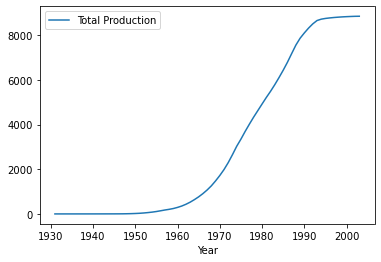

In [58]:
# 4.2
Em.plot(x='Year',y='Total Production')

In [70]:
# 4.3
median = Em['Total Production'].median()#中位数
mean = Em['Total Production'].mean()#平均值
var = Em['Total Production'].var()#方差
std = Em['Total Production'].std()#标准差
quantile25 = Em['Total Production'].quantile(0.25)#25%分位数
quantile75 = Em['Total Production'].quantile(0.75)#75%分位数
print(median)
print(mean)
print(var)
print(std)
print(quantile25)
print(quantile75)

1069.2284049999998
3086.5271955479457
12311926.542068858
3508.8354965812887
12.10895
6427.37991


年总产量平均值远大于中位数，75%分位数远大于25%分位数，这与方差大和4.2中的曲线结果相符合，表明年均产生量大幅度增长。